## Reference

- https://www.kaggle.com/c/walmart-recruiting-trip-type-classification
- https://github.com/AntonUBC/Walmart-Trip-Type-Classification

In [136]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
%pwd

'/home/yjoung90/Documents/datascience/teamproject2'

In [7]:
train = pd.read_csv('/home/yjoung90/Documents/datascience/teamproject2/walmartdata/train.csv')
test = pd.read_csv('/home/yjoung90/Documents/datascience/teamproject2/walmartdata/test.csv')
# sub_example = pd.read_csv('../teamproject2/sample_submission.csv')

In [8]:
train.tail()

TripType  VisitNumber Weekday           Upc  ScanCount  \
647049        39       191346  Sunday  3.239000e+10          1   
647050        39       191346  Sunday  7.874205e+09          1   
647051        39       191346  Sunday  4.072000e+03          1   
647052         8       191347  Sunday  4.190008e+09          1   
647053         8       191347  Sunday  3.800060e+09          1   

       DepartmentDescription  FinelineNumber  
647049          PHARMACY OTC          1118.0  
647050          FROZEN FOODS          1752.0  
647051               PRODUCE          4170.0  
647052                 DAIRY          1512.0  
647053     GROCERY DRY GOODS          3600.0

In [9]:
train.describe()

TripType    VisitNumber           Upc      ScanCount  \
count  647054.000000  647054.000000  6.429250e+05  647054.000000   
mean       58.584511   96167.640078  3.060698e+10       1.108878   
std       157.635533   55545.485154  9.120134e+10       0.700776   
min         3.000000       5.000000  8.340000e+02     -12.000000   
25%        27.000000   49268.000000  3.400001e+09       1.000000   
50%        39.000000   97074.000000  7.050103e+09       1.000000   
75%        40.000000  144316.000000  3.006531e+10       1.000000   
max       999.000000  191347.000000  9.789707e+11      71.000000   

       FinelineNumber  
count   642925.000000  
mean      3726.884567  
std       2780.966158  
min          0.000000  
25%       1404.000000  
50%       3352.000000  
75%       5501.000000  
max       9998.000000

In [10]:
test.tail()

VisitNumber Weekday           Upc  ScanCount DepartmentDescription  \
653641       191348  Sunday  6.657211e+10          1       BATH AND SHOWER   
653642       191348  Sunday  8.818139e+10          1       BATH AND SHOWER   
653643       191348  Sunday  4.282557e+09          1             MENS WEAR   
653644       191348  Sunday  8.046919e+10          1    SWIMWEAR/OUTERWEAR   
653645       191348  Sunday  7.871536e+09          1             MENS WEAR   

        FinelineNumber  
653641          1505.0  
653642          1099.0  
653643          8220.0  
653644           114.0  
653645          4923.0

In [11]:
print(len(train['FinelineNumber'].unique()))
print(train['FinelineNumber'].unique())

5196
[1000. 8931. 4504. ... 8257. 4314. 7130.]


In [12]:
print(len(train['DepartmentDescription'].unique()))
print(train['DepartmentDescription'].unique())

69
['FINANCIAL SERVICES' 'SHOES' 'PERSONAL CARE' 'PAINT AND ACCESSORIES'
 'DSD GROCERY' 'MEAT - FRESH & FROZEN' 'DAIRY' 'PETS AND SUPPLIES'
 'HOUSEHOLD CHEMICALS/SUPP' nan 'IMPULSE MERCHANDISE' 'PRODUCE'
 'CANDY, TOBACCO, COOKIES' 'GROCERY DRY GOODS' 'BOYS WEAR'
 'FABRICS AND CRAFTS' 'JEWELRY AND SUNGLASSES' 'MENS WEAR' 'ACCESSORIES'
 'HOME MANAGEMENT' 'FROZEN FOODS' 'SERVICE DELI'
 'INFANT CONSUMABLE HARDLINES' 'PRE PACKED DELI' 'COOK AND DINE'
 'PHARMACY OTC' 'LADIESWEAR' 'COMM BREAD' 'BAKERY' 'HOUSEHOLD PAPER GOODS'
 'CELEBRATION' 'HARDWARE' 'BEAUTY' 'AUTOMOTIVE' 'BOOKS AND MAGAZINES'
 'SEAFOOD' 'OFFICE SUPPLIES' 'LAWN AND GARDEN' 'SHEER HOSIERY' 'WIRELESS'
 'BEDDING' 'BATH AND SHOWER' 'HORTICULTURE AND ACCESS' 'HOME DECOR' 'TOYS'
 'INFANT APPAREL' 'LADIES SOCKS' 'PLUS AND MATERNITY' 'ELECTRONICS'
 'GIRLS WEAR, 4-6X  AND 7-14' 'BRAS & SHAPEWEAR' 'LIQUOR,WINE,BEER'
 'SLEEPWEAR/FOUNDATIONS' 'CAMERAS AND SUPPLIES' 'SPORTING GOODS'
 'PLAYERS AND ELECTRONICS' 'PHARMACY RX' 'MENSWEAR' 'OP

In [13]:
print(len(train['TripType'].unique()))
print(train['TripType'].unique())

38
[999  30  26   8  35  41  21   6  42   7   9  39  25  38  15  36  20  37
  32  40   5   3   4  24  33  43  31  27  34  18  29  44  19  23  22  28
  14  12]


In [14]:
train['count'] = 1

In [15]:
train.pivot_table(values='count', columns=['TripType',], aggfunc=np.sum)

TripType   3    4      5     6      7      8      9     12   14    15   ...    \
count     6827  901  13836  3405  23199  22844  16820  2108   35  7147  ...     

TripType    36     37     38     39      40    41     42    43     44     999  
count     21990  38954  29565  95504  174164  5508  19468  6383  20424  17590  

[1 rows x 38 columns]

In [16]:
train.pivot_table(values='count', columns=['DepartmentDescription'], aggfunc=np.sum)

DepartmentDescription  1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  \
count                         394         1318        5414    7168   

DepartmentDescription  BATH AND SHOWER  BEAUTY  BEDDING  BOOKS AND MAGAZINES  \
count                             4582   14865     2307                  992   

DepartmentDescription  BOYS WEAR  BRAS & SHAPEWEAR    ...     SEAFOOD  \
count                       3892              2036    ...        1923   

DepartmentDescription  SEASONAL  SERVICE DELI  SHEER HOSIERY  SHOES  \
count                        29         10127            434   6099   

DepartmentDescription  SLEEPWEAR/FOUNDATIONS  SPORTING GOODS  \
count                                   2376            5087   

DepartmentDescription  SWIMWEAR/OUTERWEAR  TOYS  WIRELESS  
count                                 860  6107      1898  

[1 rows x 68 columns]

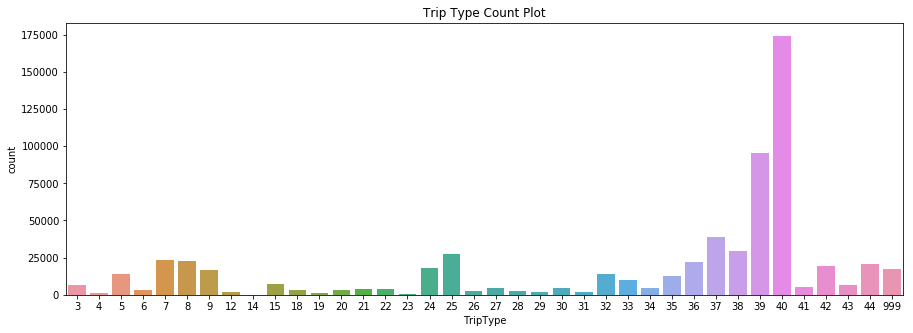

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='TripType', data=train)
plt.title('Trip Type Count Plot')
plt.show()

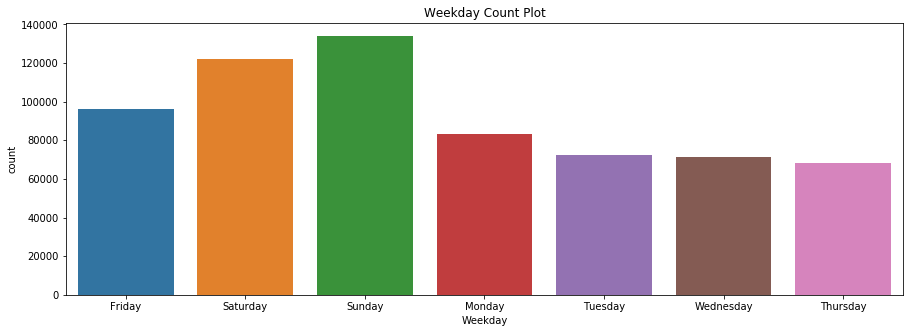

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Weekday', data=train)
plt.title('Weekday Count Plot')
plt.show()

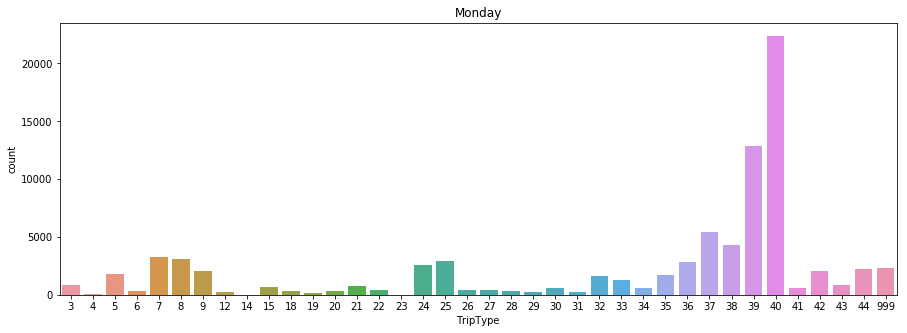

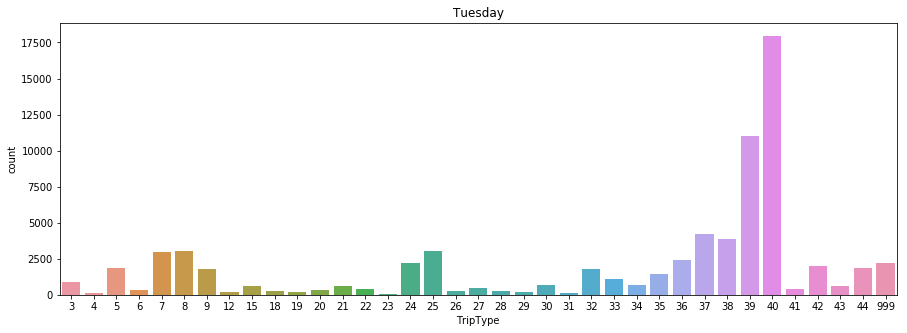

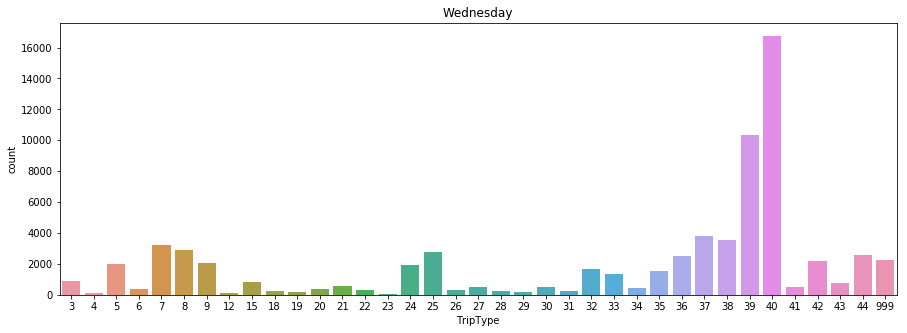

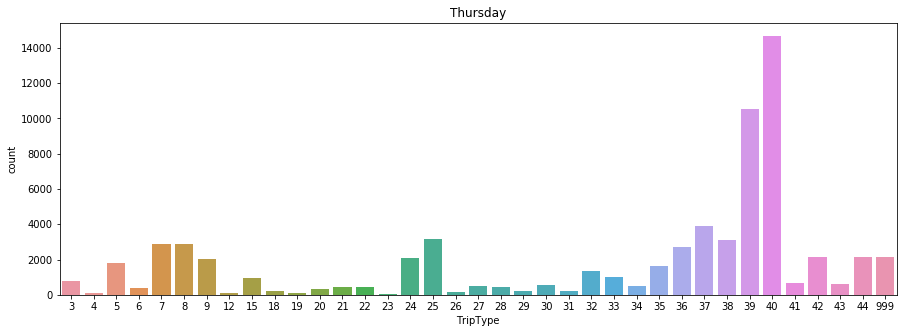

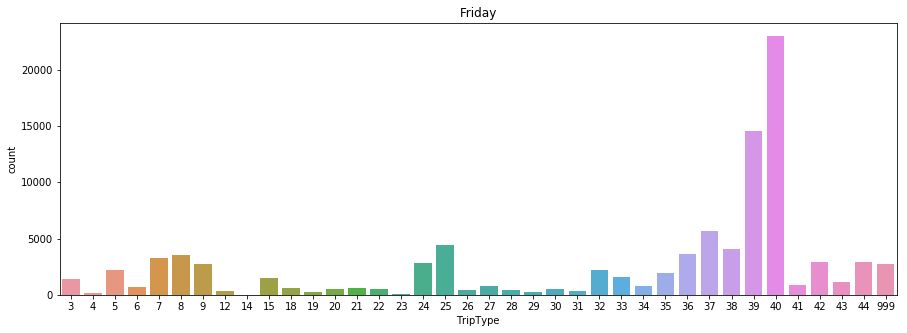

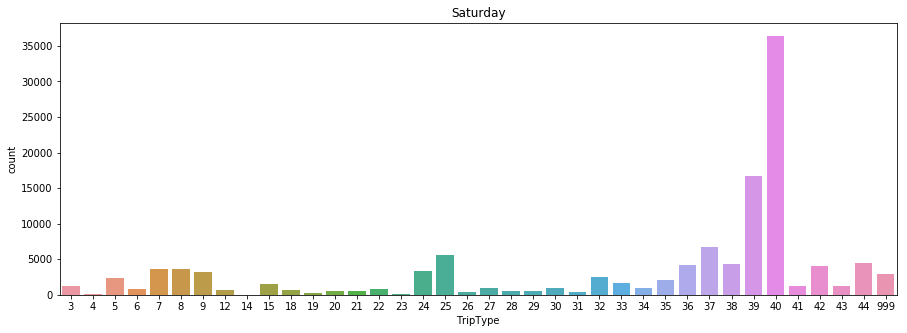

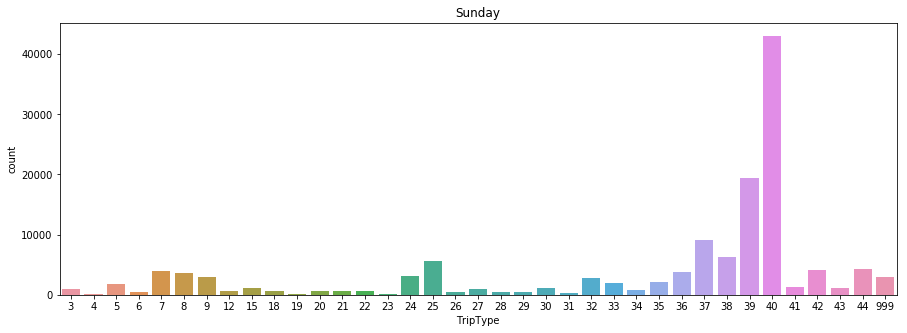

In [68]:
weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in weekday:
    tmp = train[train['Weekday'] == day]
    plt.figure(figsize=(15,5))
    sns.countplot(x='TripType', data=tmp)
    plt.title('{}'.format(day))
plt.show()

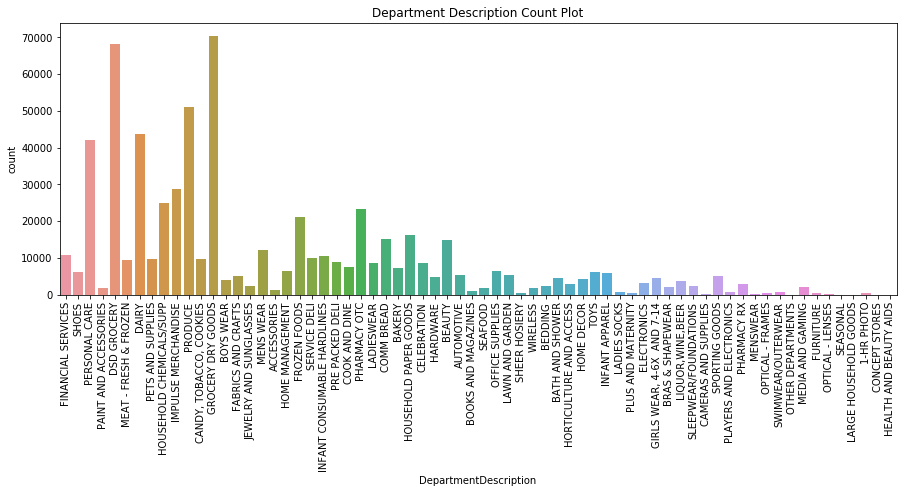

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='DepartmentDescription', data=train)
plt.title('Department Description Count Plot')
plt.xticks(rotation='vertical')
plt.show()

/home/yjoung90/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


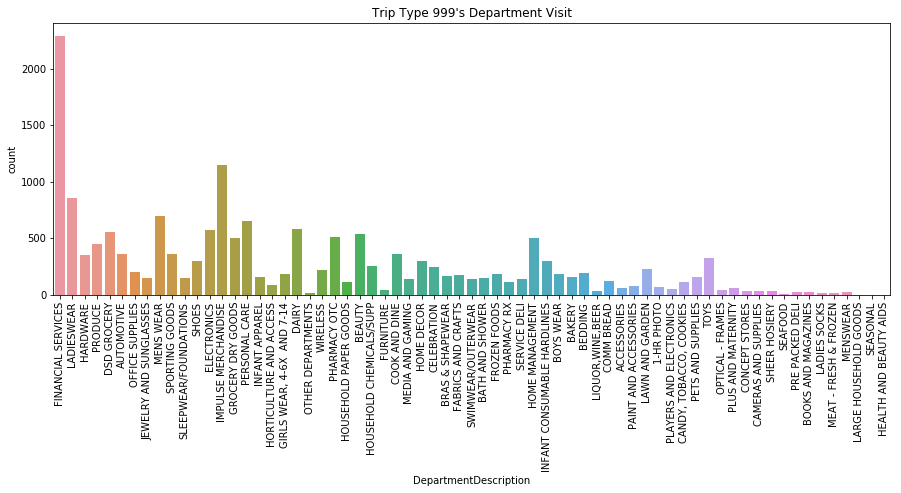

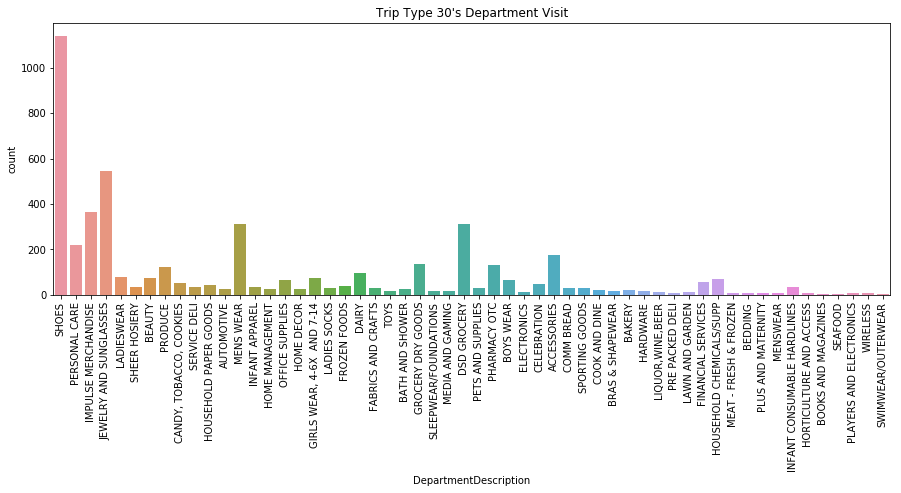

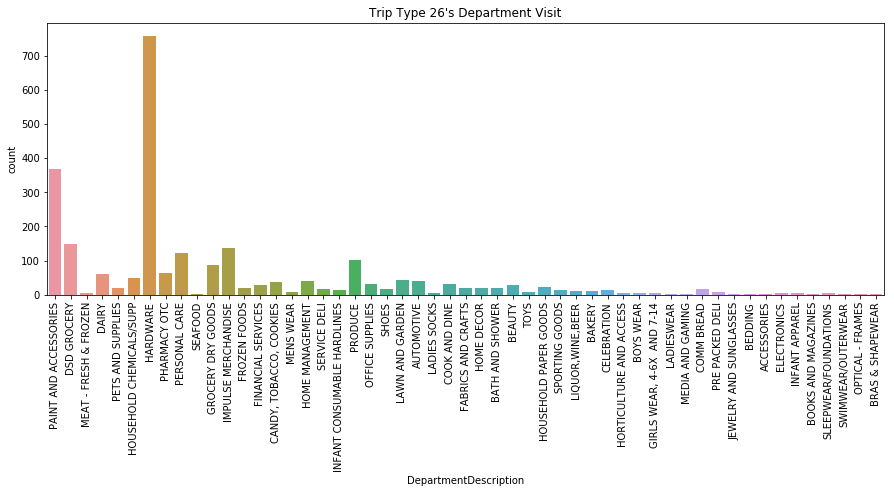

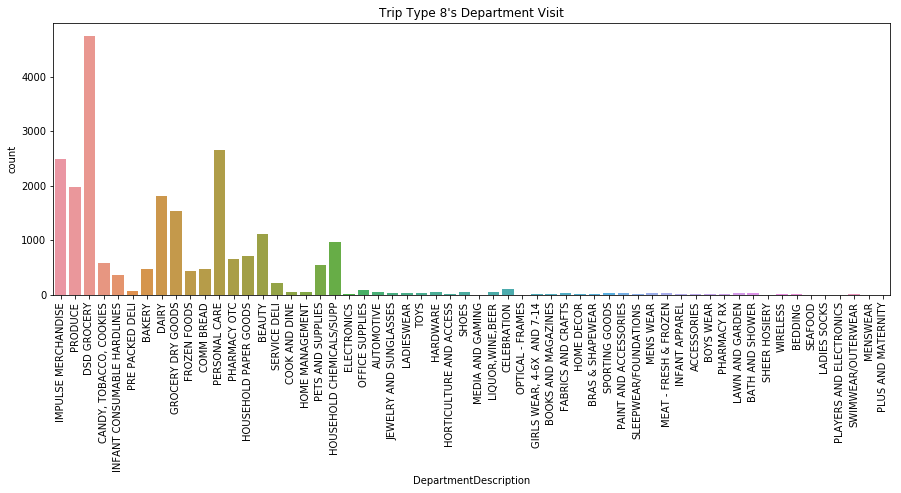

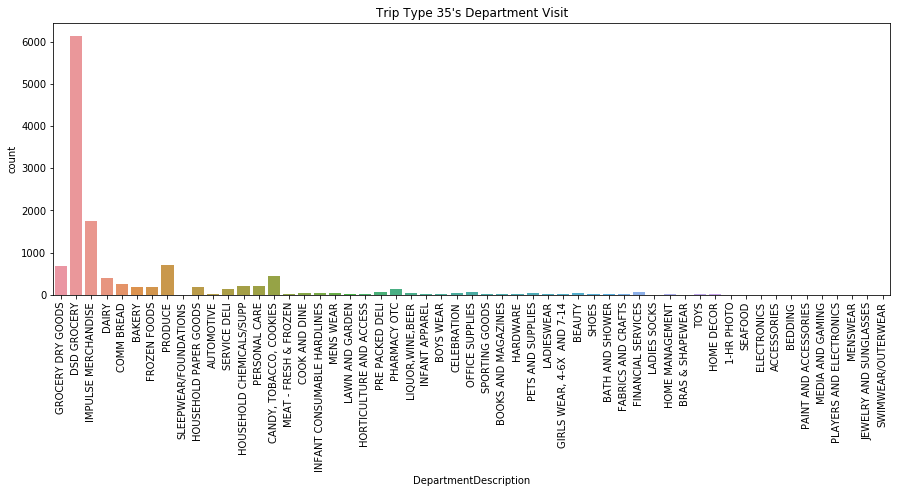

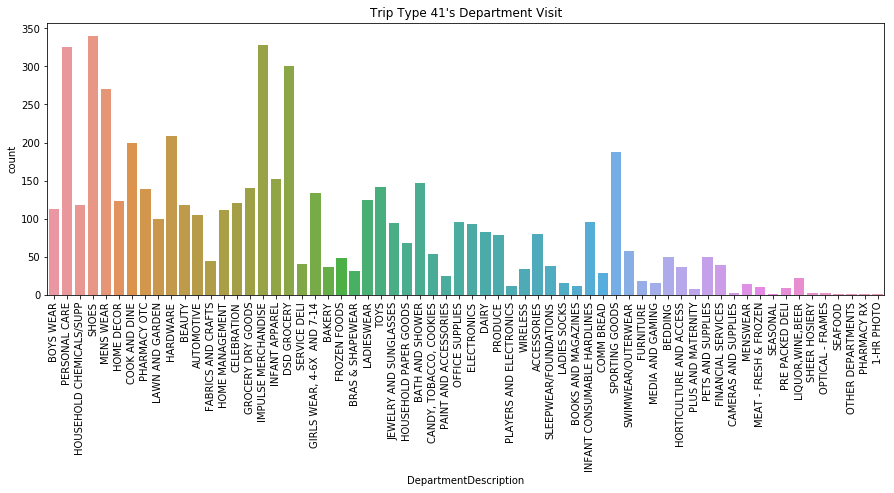

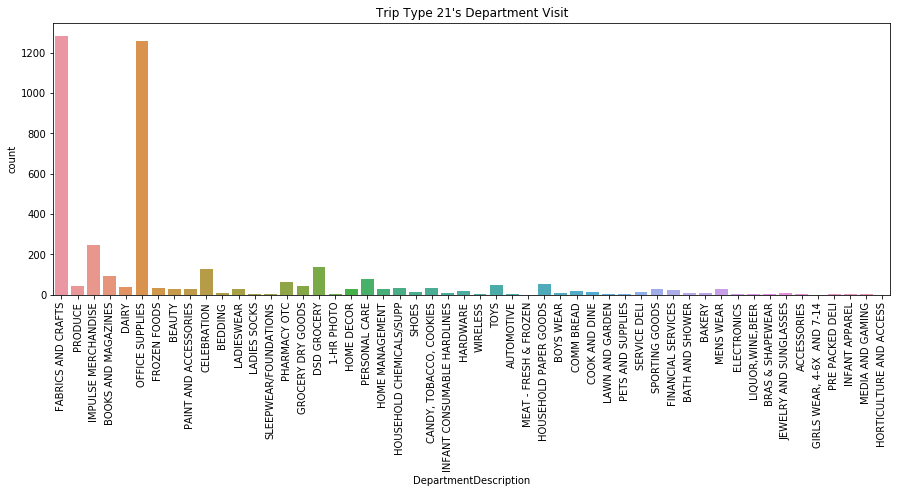

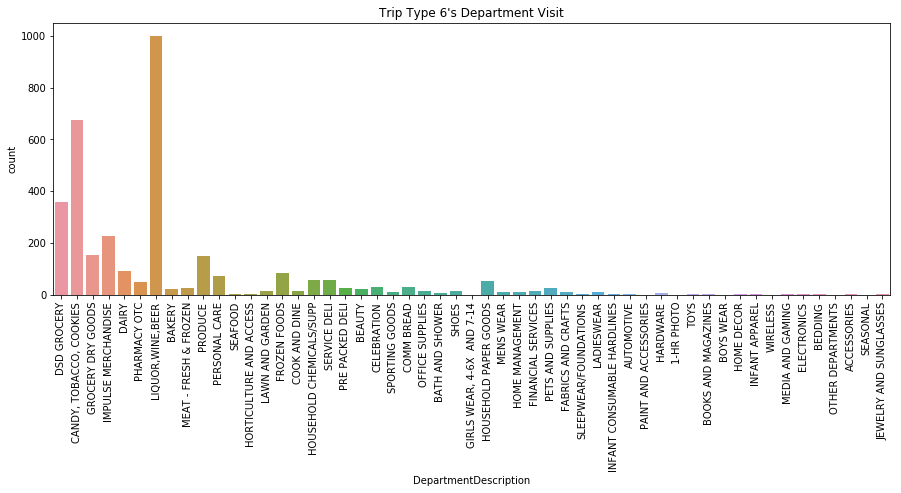

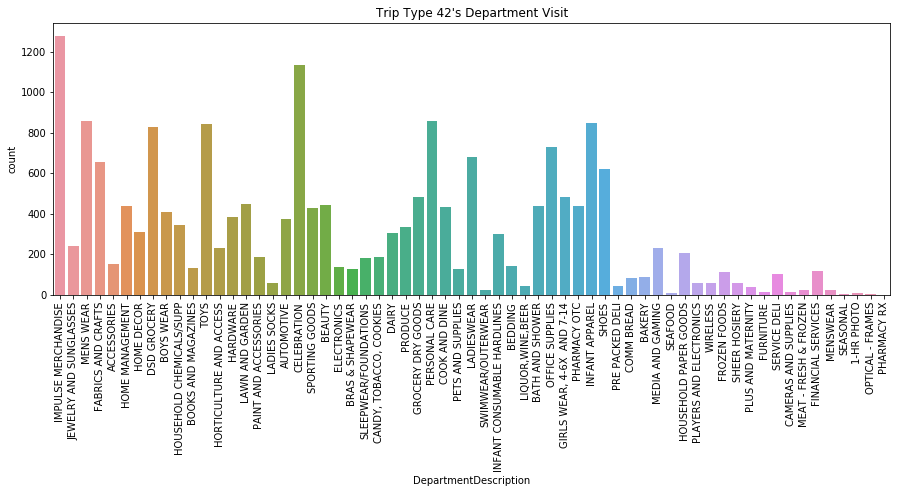

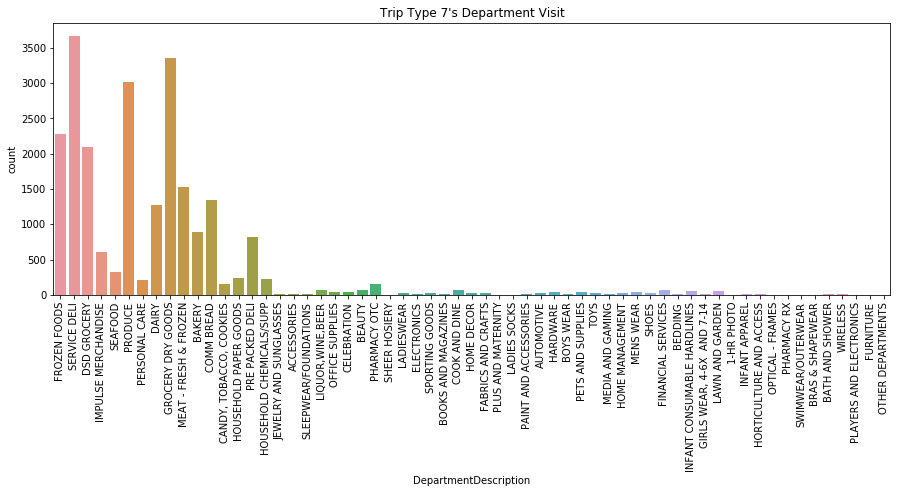

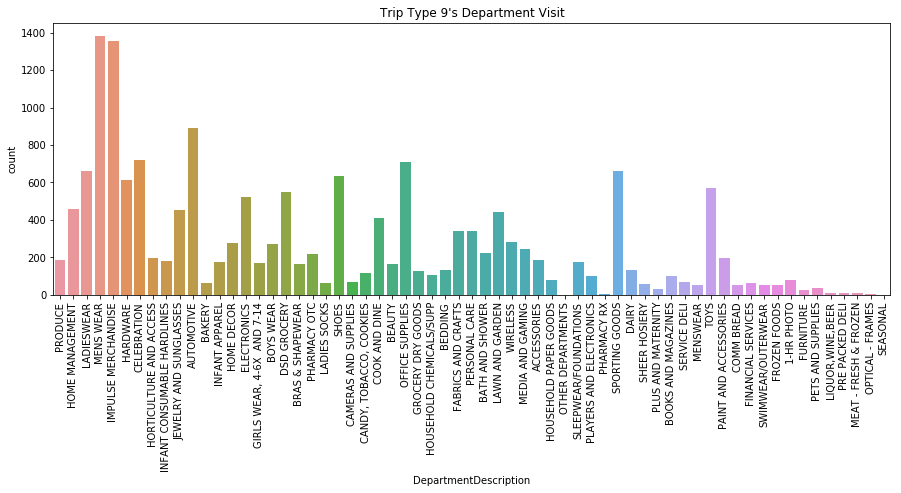

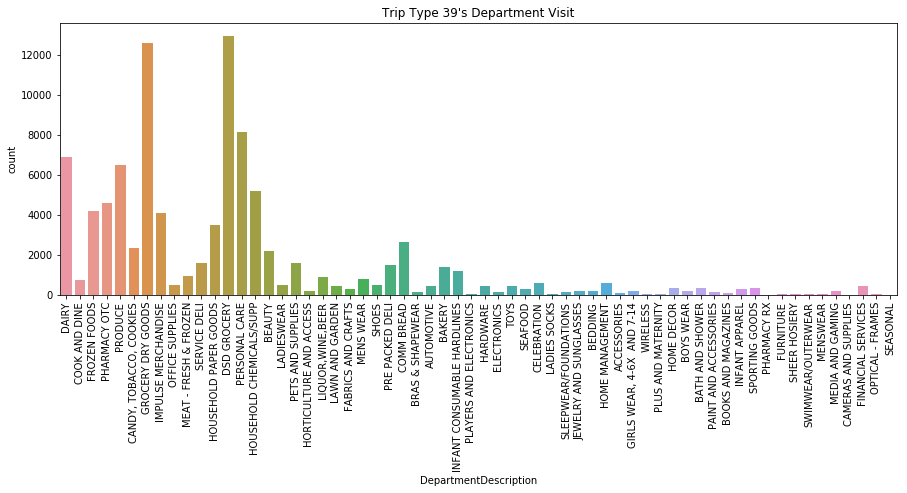

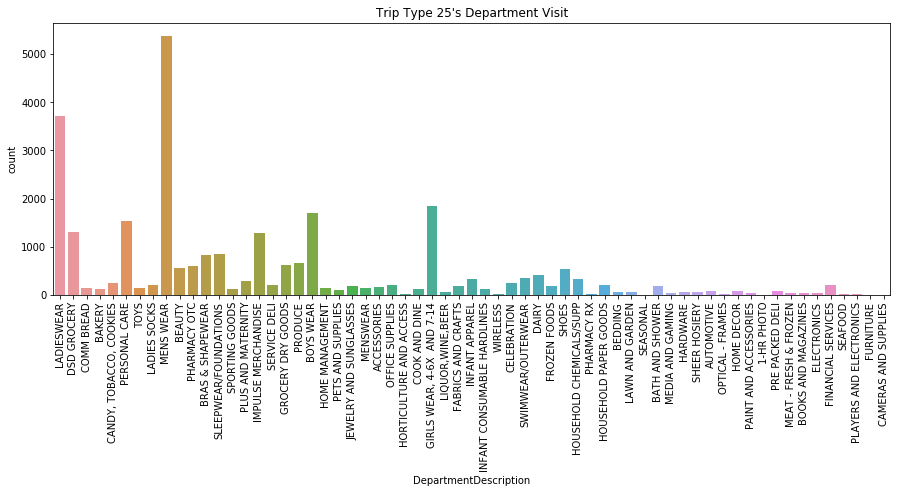

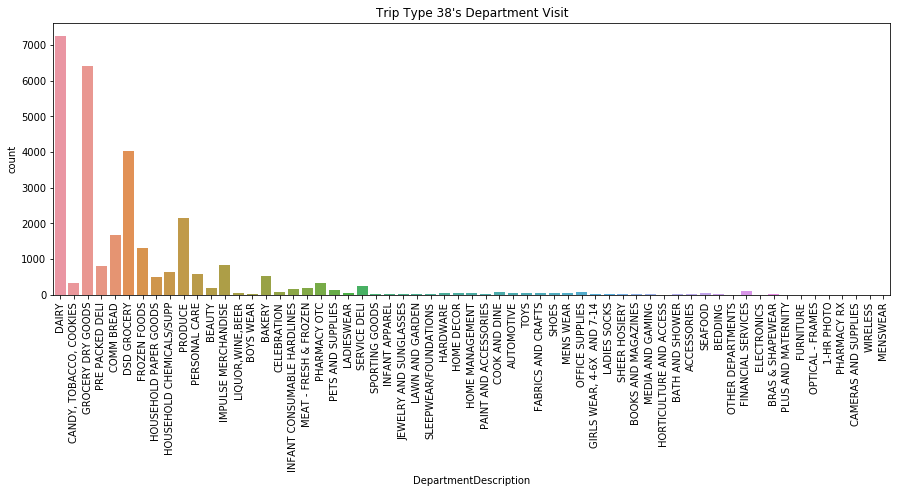

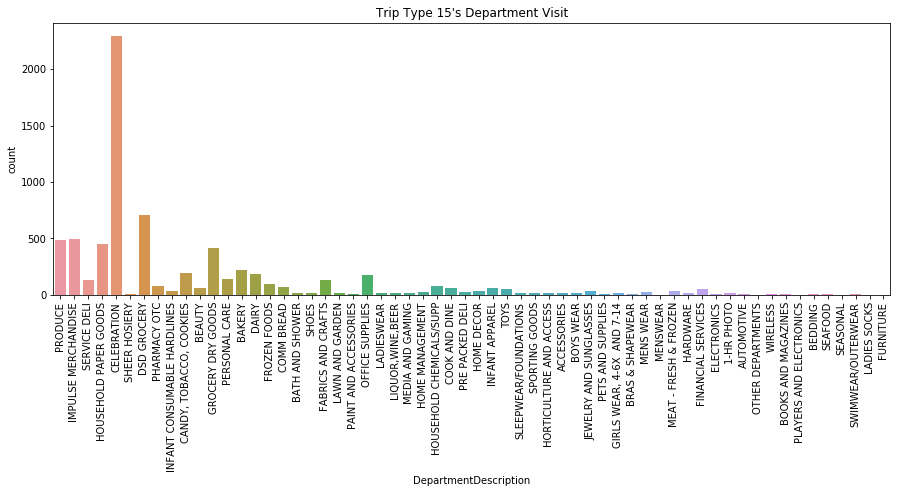

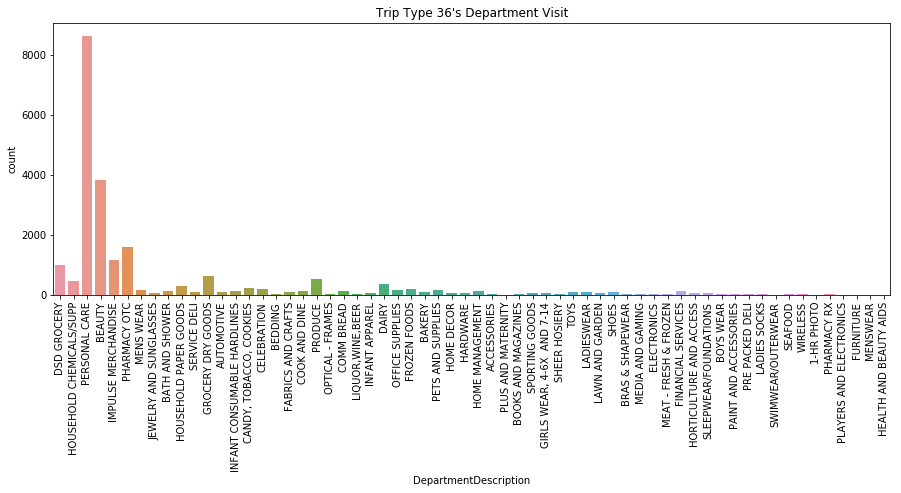

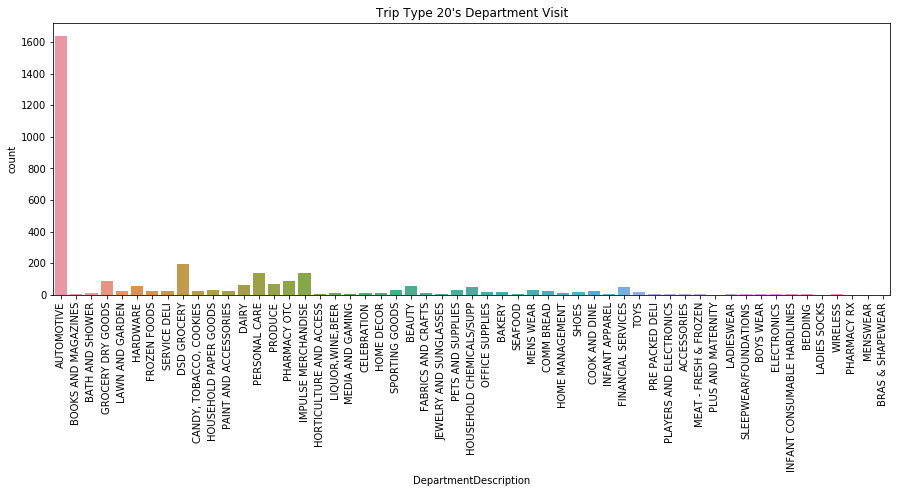

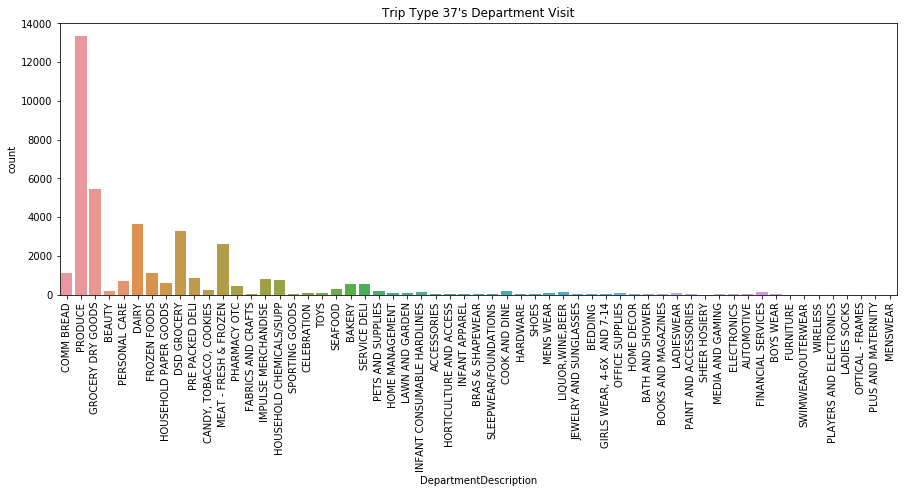

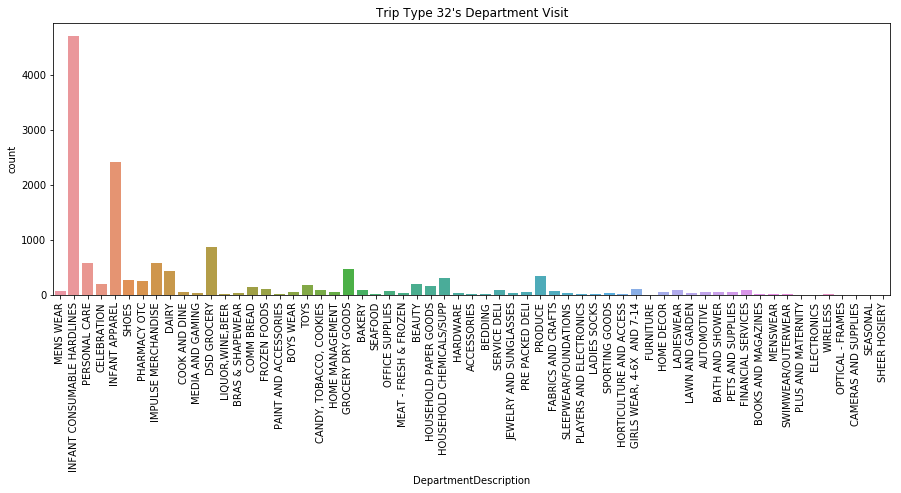

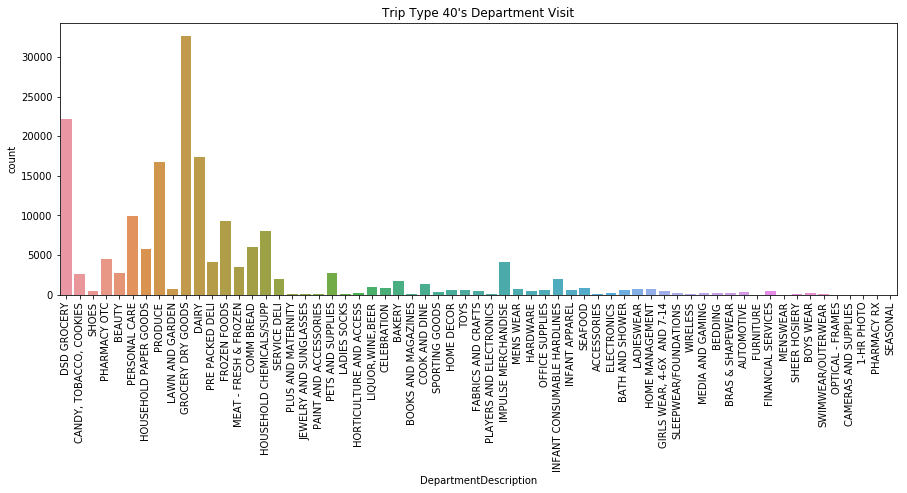

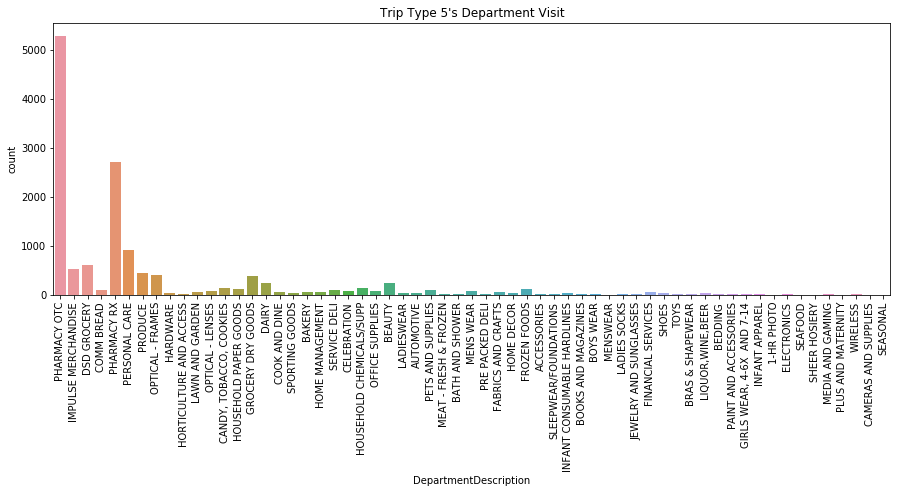

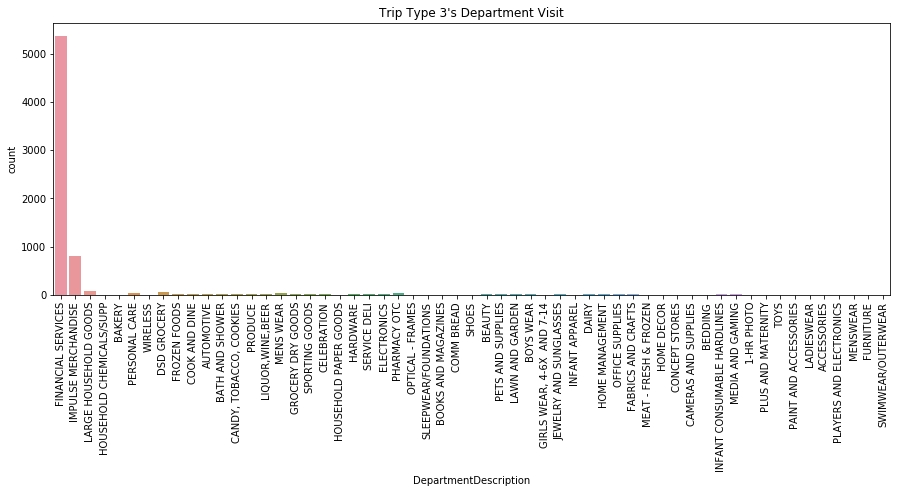

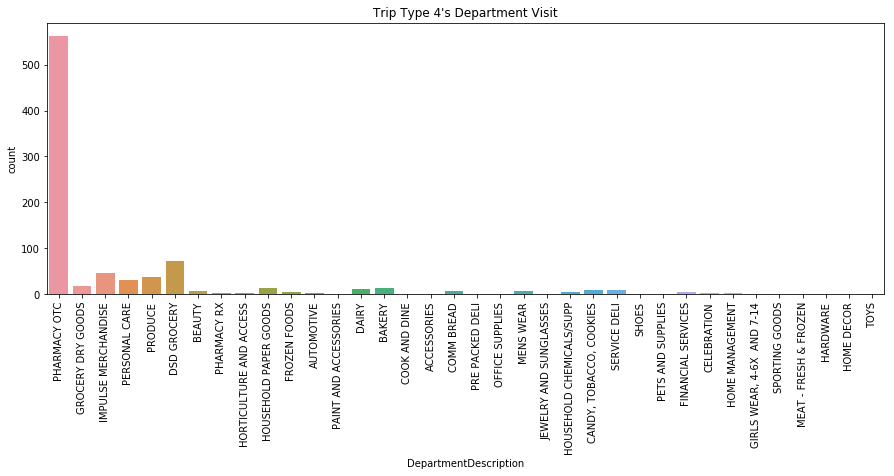

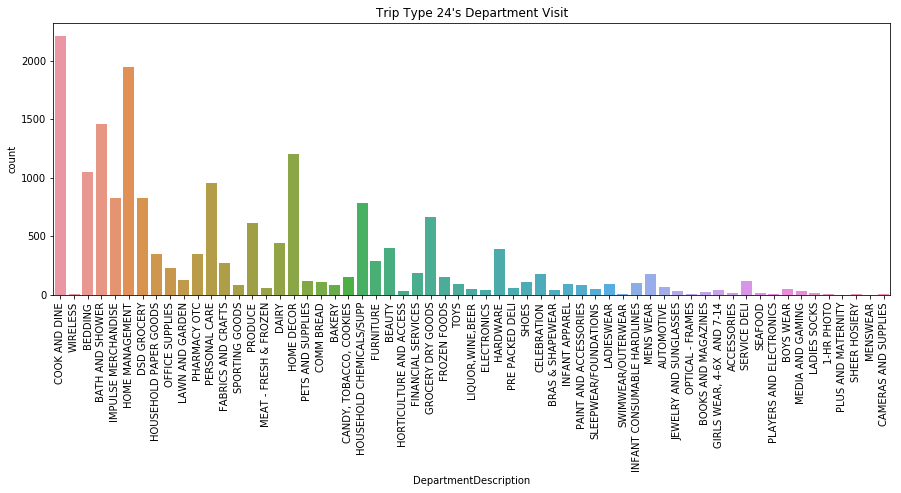

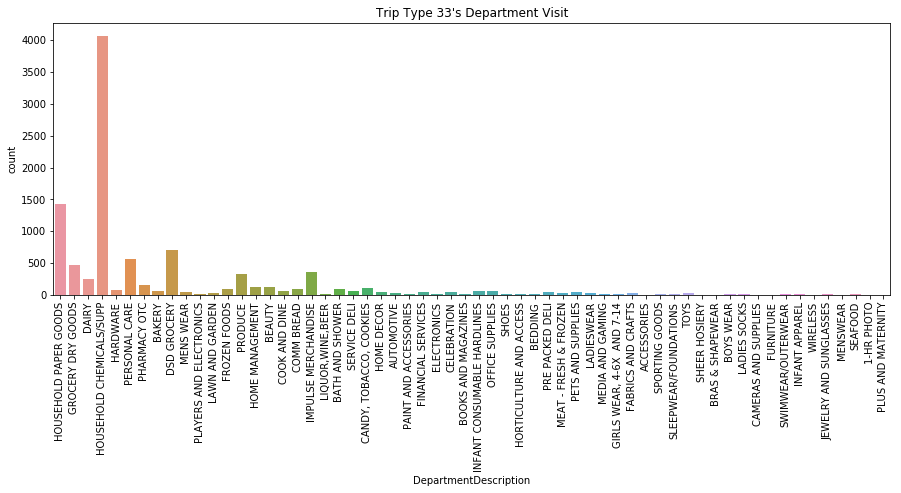

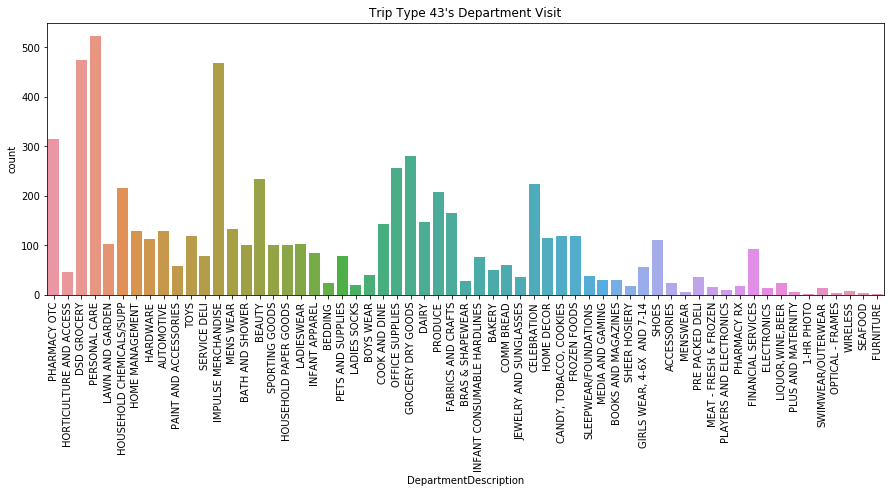

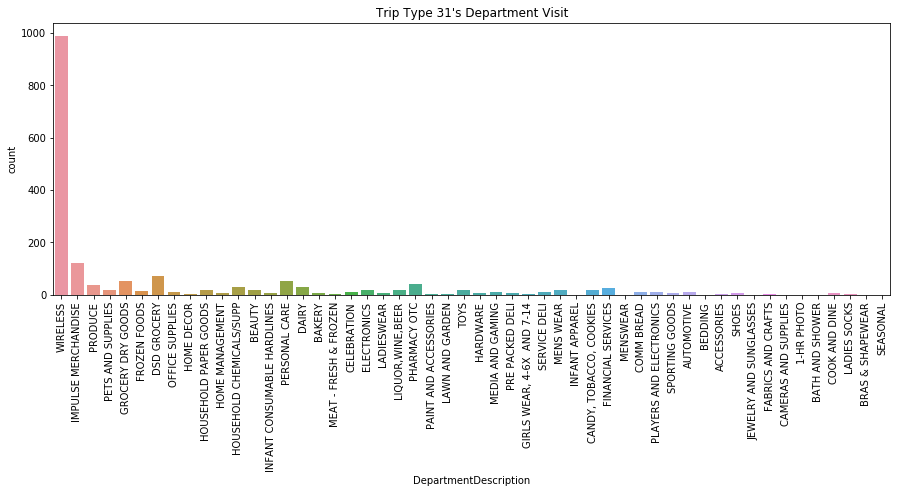

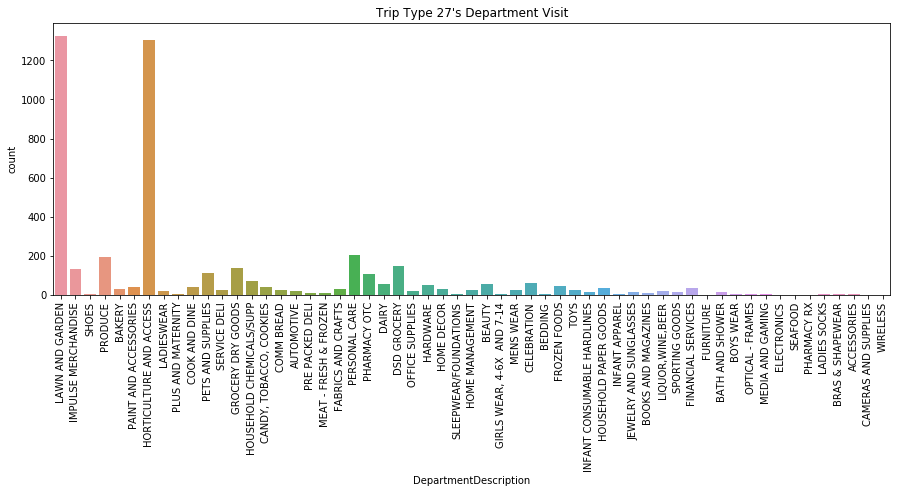

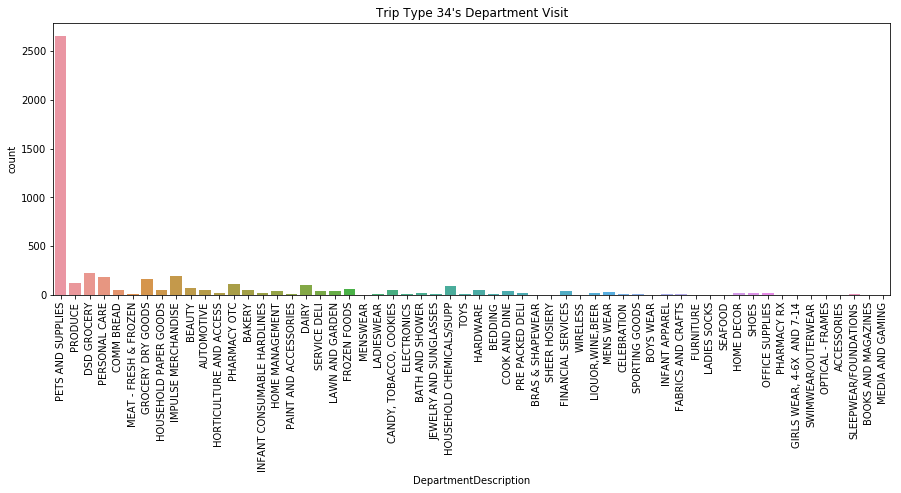

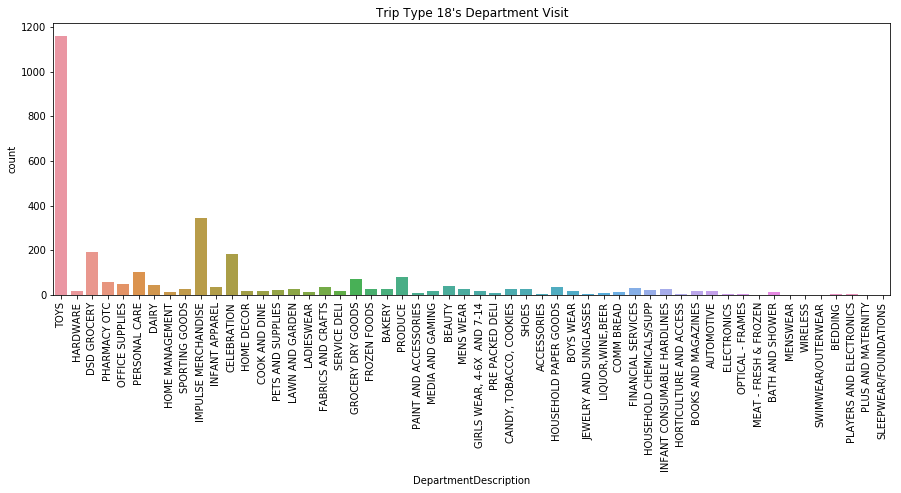

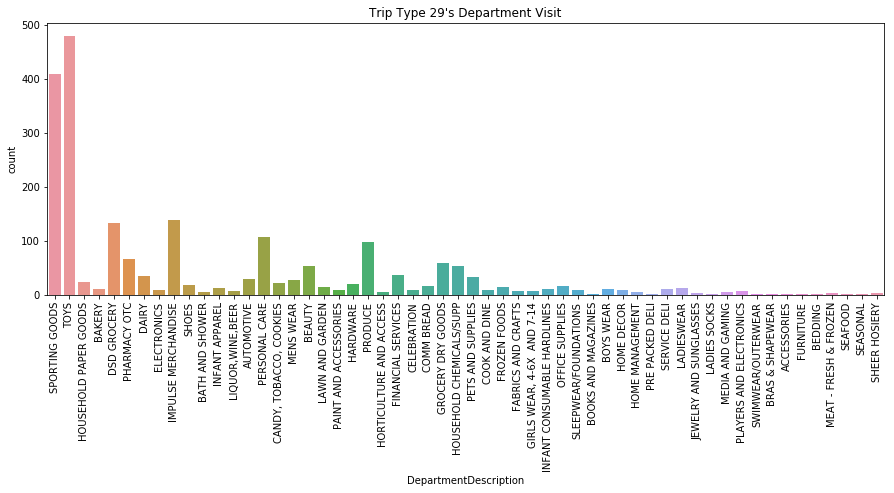

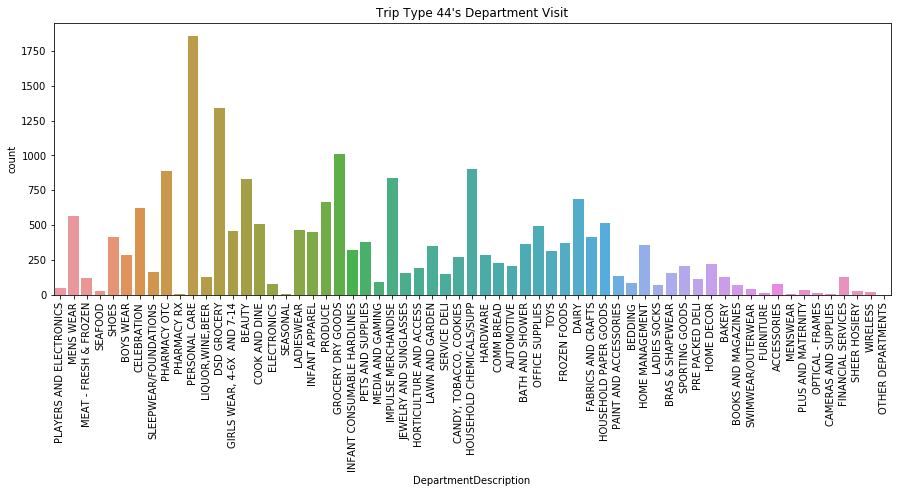

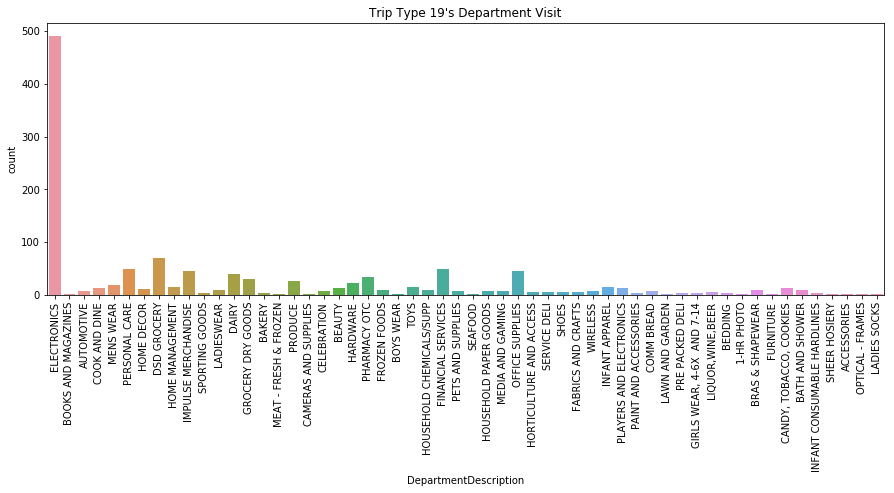

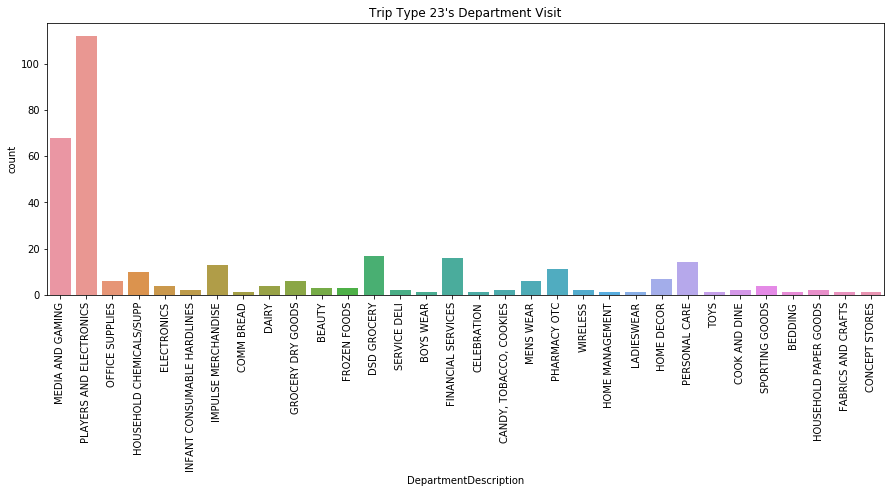

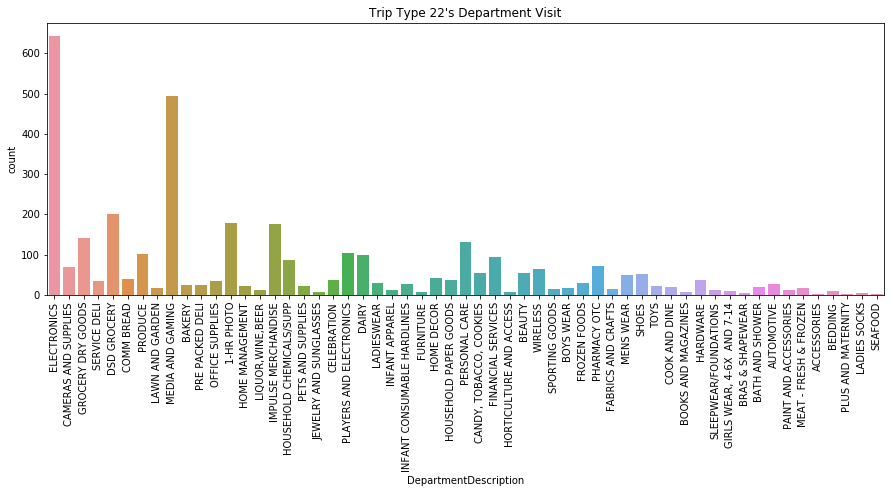

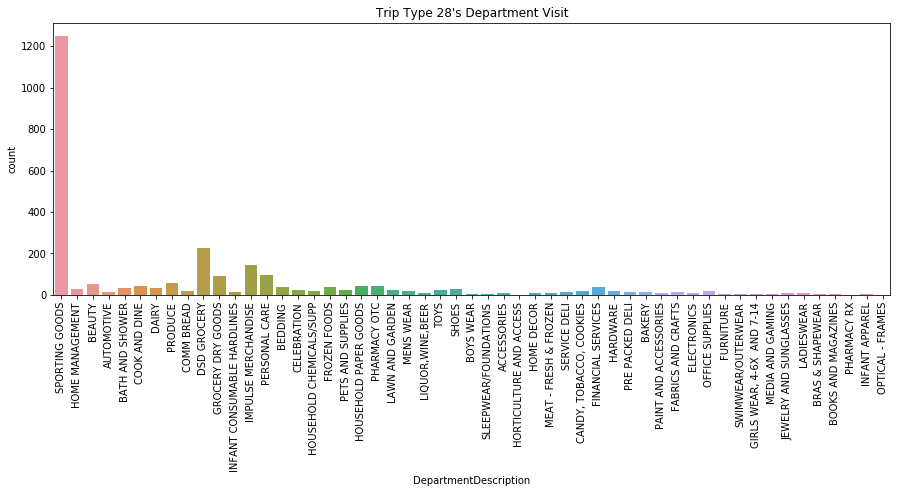

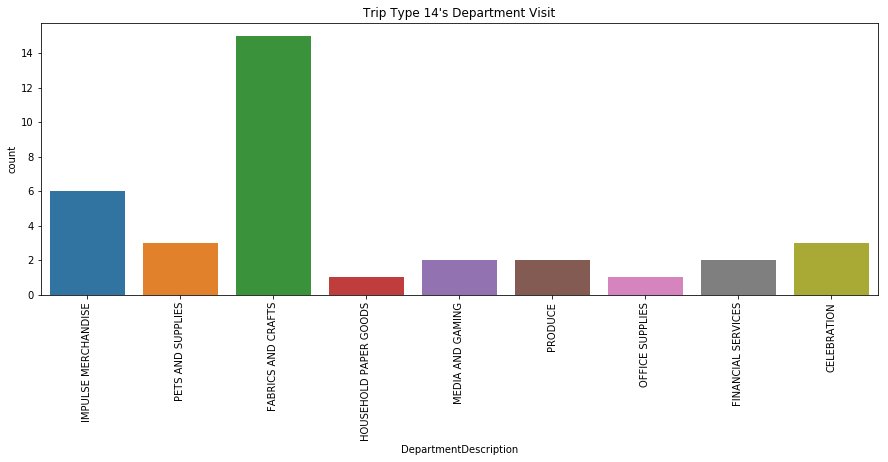

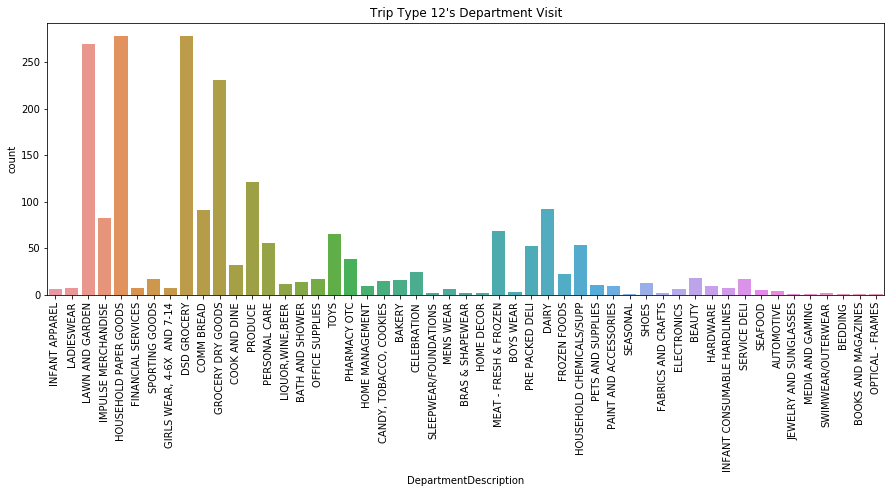

In [69]:
for num in train['TripType'].unique():
    tmp = train[train['TripType'] == num]
    plt.figure(figsize=(15,5))
    sns.countplot(x='DepartmentDescription', data=tmp)
    plt.xticks(rotation='vertical')
    plt.title("Trip Type {}'s Department Visit".format(num))
plt.show()

In [44]:
train.pivot_table(values='count', index=['DepartmentDescription','FinelineNumber'], aggfunc=np.sum)

count
DepartmentDescription FinelineNumber       
1-HR PHOTO            110.0              60
                      120.0              72
                      130.0              10
                      141.0               1
                      150.0             106
                      160.0               2
                      170.0              15
                      180.0              64
                      190.0               3
                      817.0               2
                      8021.0             41
                      9800.0             18
ACCESSORIES           4.0                22
                      10.0                9
                      40.0                3
                      66.0               22
                      103.0               5
                      104.0             141
                      108.0              18
                      109.0               1
                      121.0             102
                      122.0              21
                      127.0               3
                      128.0              14
                      151.0              17
                      153.0               5
                      166.0              17
                      174.0               2
                      178.0               5
                      181.0               4
...                                     ...
WIRELESS              1290.0             28
                      1465.0              9
                      1470.0              9
                      1565.0              4
                      1566.0              3
                      1590.0              7
                      1710.0             25
                      1712.0             52
                      1719.0              6
                      1722.0              1
                      1733.0             25
                      1741.0              2
                      1742.0              2
                      1743.0              1
                      1747.0              5
                      1749.0              1
                      1750.0             13
                      1752.0              7
                      1754.0             16
                      1755.0             21
                      1765.0              1
                      1790.0              2
                      1865.0              2
                      1872.0              1
                      1874.0              2
                      1875.0              4
                      1876.0              3
                      1877.0              1
                      1890.0              3
                      9998.0            357

[10488 rows x 1 columns]

In [43]:
train.pivot_table(values='count', index=['TripType', 'DepartmentDescription', 'FinelineNumber'], aggfunc=np.sum)

count
TripType DepartmentDescription FinelineNumber       
3        1-HR PHOTO            110.0               1
                               170.0               1
         ACCESSORIES           812.0               1
                               920.0               1
         AUTOMOTIVE            103.0               2
                               900.0               3
                               905.0               1
                               910.0               1
                               1040.0              1
                               1510.0              1
                               2030.0              1
                               2045.0              1
                               2500.0              1
                               4001.0              1
                               4025.0              1
                               4034.0              1
                               4040.0              1
                               5004.0              1
                               5011.0              1
                               5212.0              1
                               6038.0              1
         BAKERY                1026.0              1
                               2001.0              1
                               4009.0              1
                               5017.0              2
         BATH AND SHOWER       421.0               1
                               1016.0              1
                               1099.0              1
                               1340.0              1
                               1721.0              1
...                                              ...
999      WIRELESS              765.0               3
                               790.0               7
                               865.0               2
                               870.0               1
                               890.0               1
                               950.0               1
                               965.0               1
                               970.0               1
                               990.0               3
                               1040.0              1
                               1050.0              1
                               1065.0              1
                               1080.0              1
                               1090.0              2
                               1165.0             10
                               1190.0              3
                               1265.0              7
                               1290.0             10
                               1590.0              2
                               1710.0              2
                               1712.0              8
                               1741.0              1
                               1742.0              1
                               1743.0              1
                               1752.0              1
                               1754.0              1
                               1755.0              4
                               1872.0              1
                               1876.0              1
                               9998.0             20

[86022 rows x 1 columns]

In [42]:
train.pivot_table(values='count', index=['TripType', 'DepartmentDescription', 'FinelineNumber','Upc'], aggfunc=np.sum)

count
TripType DepartmentDescription FinelineNumber Upc                
3        1-HR PHOTO            110.0          6.811317e+10      1
                               170.0          2.349720e+10      1
         ACCESSORIES           812.0          1.265585e+09      1
                               920.0          9.107407e+09      1
         AUTOMOTIVE            103.0          7.919123e+09      2
                               900.0          7.365115e+10      2
                                              7.365116e+10      1
                               905.0          7.365116e+10      1
                               910.0          7.365116e+10      1
                               1040.0         7.919100e+09      1
                               1510.0         9.821311e+09      1
                               2030.0         7.874202e+09      1
                               2045.0         4.816802e+09      1
                               2500.0         7.450991e+09      1
                               4001.0         7.038213e+09      1
                               4025.0         7.724998e+09      1
                               4034.0         7.911820e+09      1
                               4040.0         7.466000e+09      1
                               5004.0         3.167311e+09      1
                               5011.0         8.113411e+09      1
                               5212.0         8.433880e+10      1
                               6038.0         5.400704e+09      1
         BAKERY                1026.0         9.870000e+03      1
                               2001.0         7.874207e+09      1
                               4009.0         7.874209e+09      1
                               5017.0         6.811311e+10      2
         BATH AND SHOWER       421.0          8.964001e+11      1
                               1016.0         3.228132e+09      1
                               1099.0         8.818139e+10      1
                               1340.0         6.655384e+10      1
...                                                           ...
999      WIRELESS              1165.0         6.169600e+10      2
                                              6.169600e+10      2
                                              6.169601e+10      2
                                              6.169601e+10      2
                               1190.0         6.169601e+10      1
                                              6.169601e+10      1
                                              6.169601e+10      1
                               1265.0         6.102146e+10      6
                                              6.102146e+10      1
                               1290.0         6.102146e+10      1
                                              6.102146e+10      8
                                              6.102146e+10      1
                               1590.0         7.149518e+10      2
                               1710.0         7.350780e+10      1
                                              7.350780e+10      1
                               1712.0         6.505300e+10      2
                                              6.505300e+10      1
                                              6.505300e+10      2
                                              7.350780e+10      2
                                              7.350780e+10      1
                               1741.0         8.447020e+10      1
                               1742.0         8.104720e+10      1
                               1743.0         8.104720e+10      1
                               1752.0         2.837791e+09      1
                               1754.0         6.605434e+10      1
                               1755.0         6.605434e+10      3
                                              6.853874e+10      1
                               1872.0         4.385969e+09      1
                               187

In [72]:
train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber', 'count'],
      dtype='object')

In [98]:
pd.factorize(train['DepartmentDescription'])

(array([ 0,  1,  2, ..., 10,  6, 12]),
 Index(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE', 'PAINT AND ACCESSORIES',
        'DSD GROCERY', 'MEAT - FRESH & FROZEN', 'DAIRY', 'PETS AND SUPPLIES',
        'HOUSEHOLD CHEMICALS/SUPP', 'IMPULSE MERCHANDISE', 'PRODUCE',
        'CANDY, TOBACCO, COOKIES', 'GROCERY DRY GOODS', 'BOYS WEAR',
        'FABRICS AND CRAFTS', 'JEWELRY AND SUNGLASSES', 'MENS WEAR',
        'ACCESSORIES', 'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
        'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
        'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
        'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
        'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
        'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
        'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
        'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY', 'ELECTRONICS',
        'GIRLS W

In [100]:
weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train['weeknum'] = np.nan
for idx, day in enumerate(weekday):
    train['weeknum'] = np.where(train['Weekday'] == day, idx, train['weeknum'])

train['DD_num'] = pd.factorize(train['DepartmentDescription'])[0]

In [142]:
train

TripType  VisitNumber Weekday           Upc  ScanCount  \
0            999            5  Friday  6.811315e+10         -1   
1             30            7  Friday  6.053882e+10          1   
2             30            7  Friday  7.410811e+09          1   
3             26            8  Friday  2.238404e+09          2   
4             26            8  Friday  2.006614e+09          2   
5             26            8  Friday  2.006619e+09          2   
6             26            8  Friday  2.006614e+09          1   
7             26            8  Friday  7.004803e+09          1   
8             26            8  Friday  2.238495e+09          1   
9             26            8  Friday  2.238400e+09         -1   
10            26            8  Friday  5.200010e+09          1   
11            26            8  Friday  8.867930e+10          2   
12            26            8  Friday  2.200600e+10          1   
13            26            8  Friday  2.236760e+09          1   
14            26            8  Friday  8.867930e+10         -1   
15            26            8  Friday  2.238400e+09          2   
16            26            8  Friday  3.019294e+09          1   
17            26            8  Friday  7.245041e+10          1   
18            26            8  Friday  2.554150e+10          2   
19            26            8  Friday  2.310011e+09          1   
20            26            8  Friday  7.245040e+10          2   
21            26            8  Friday  7.874205e+09          1   
22            26            8  Friday  5.114139e+09          1   
23            26            8  Friday  5.114198e+09          1   
24            26            8  Friday  3.270011e+09          3   
25            26            8  Friday           NaN          1   
26             8            9  Friday  1.070081e+09          1   
27             8            9  Friday  3.107000e+03          1   
28             8            9  Friday  4.011000e+03          1   
29             8           10  Friday  6.414410e+09          1   
...          ...          ...     ...           ...        ...   
647024        39       191345  Sunday  3.800405e+10          2   
647025        39       191345  Sunday  3.890003e+09          1   
647026        39       191345  Sunday  3.890003e+09          1   
647027        39       191345  Sunday  7.225004e+09          1   
647028        39       191345  Sunday  7.800001e+09          1   
647029        39       191345  Sunday  1.380310e+09          1   
647030        39       191345  Sunday  4.812129e+09          2   
647031        39       191345  Sunday  3.029939e+10          1   
647032        39       191345  Sunday  3.010078e+09          2   
647033        39       191345  Sunday  7.286800e+09          1   
647034        39       191345  Sunday  3.700088e+09          1   
647035        39       191346  Sunday  3.760012e+09          1   
647036        39       191346  Sunday  3.338365e+09          1   
647037        39       191346  Sunday  4.150000e+09          1   
647038        39       191346  Sunday  1.340952e+09          1   
647039        39       191346  Sunday  7.874223e+09          1   
647040        39       191346  Sunday  3.700046e+09          1   
647041        39       191346  Sunday  5.440000e+09          1   
647042        39       191346  Sunday  2.265572e+09          1   
647043        39       191346  Sunday  3.660230e+09          1   
647044        39       191346  Sunday  5.100020e+09          1   
647045        39       191346  Sunday  7.874204e+09          1   
647046        39       191346  Sunday  3.120020e+09          1   
647047        39       191346  Sunday  3.120033e+09          1   
647048        39       191346  Sunday  3.700091e+09          1   
647049        39       191346  Sunday  3.239000e+10          1   
647050        39       191346  Sunday  7.874205e+09          1   
647051        39       191346  Sunday  4.072000e+03          1   
647052         8       191347  Sunday  4.190008e

<IPython.core.display.Javascript object>


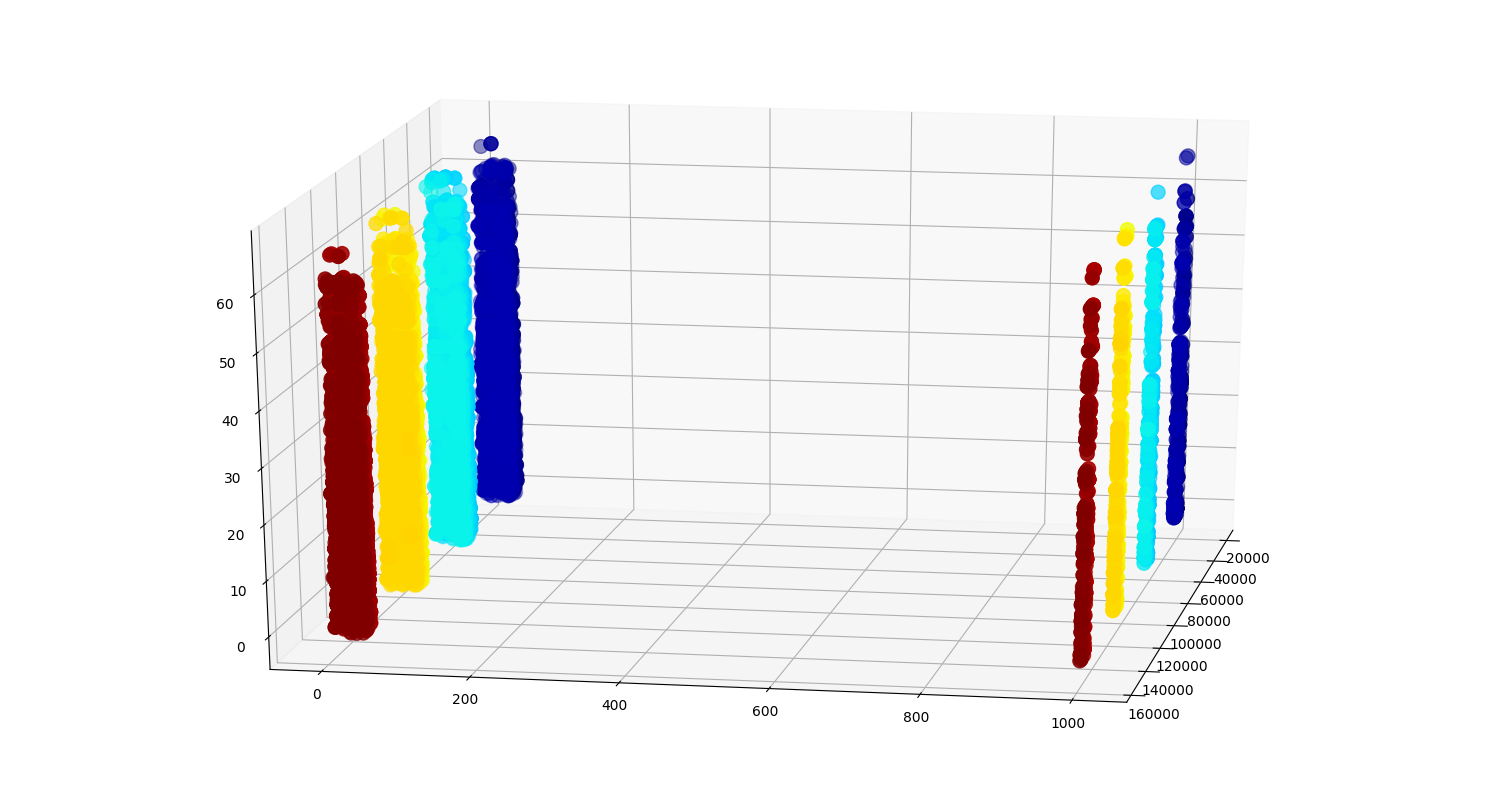

<IPython.core.display.Javascript object>


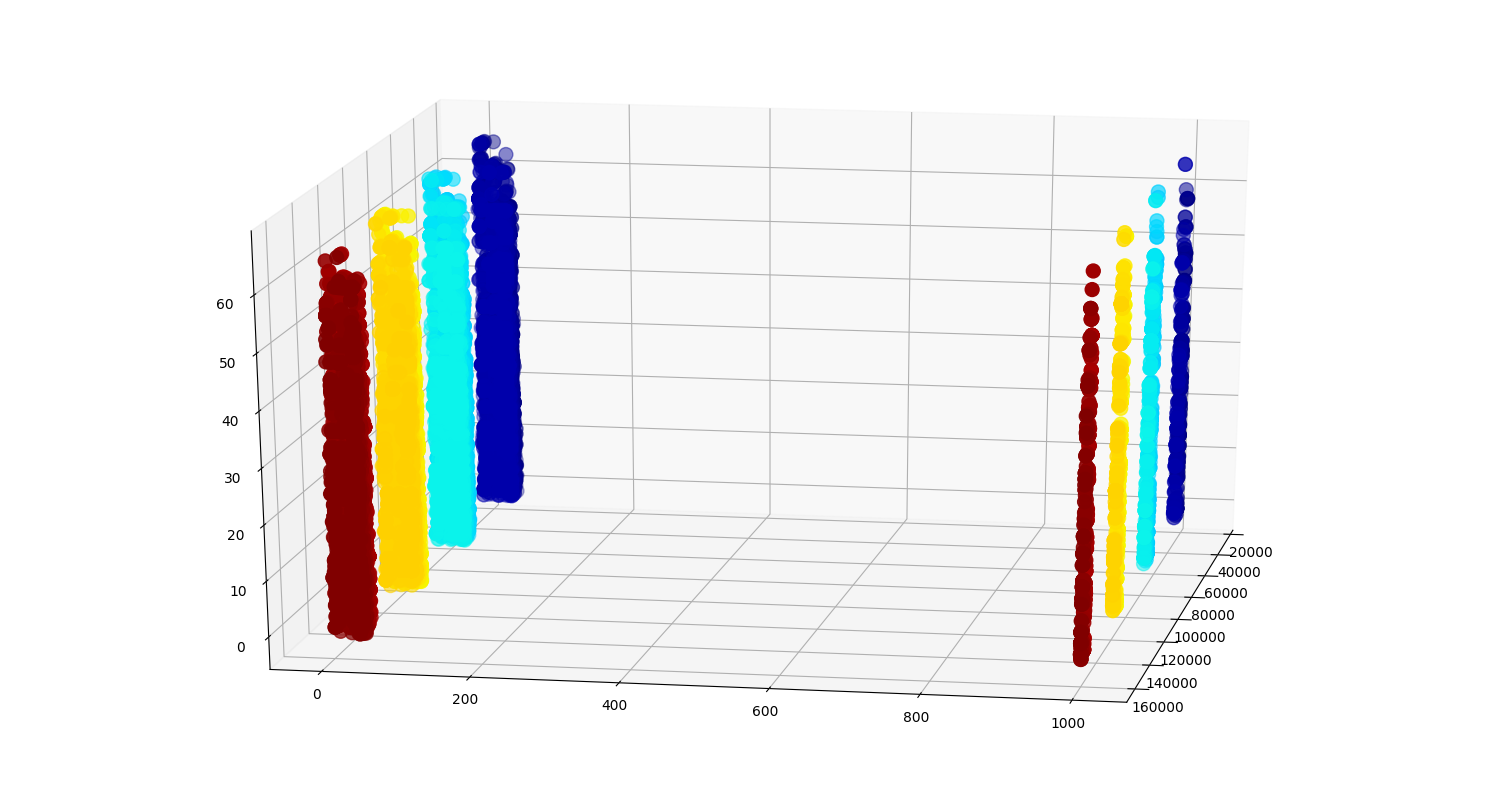

<IPython.core.display.Javascript object>


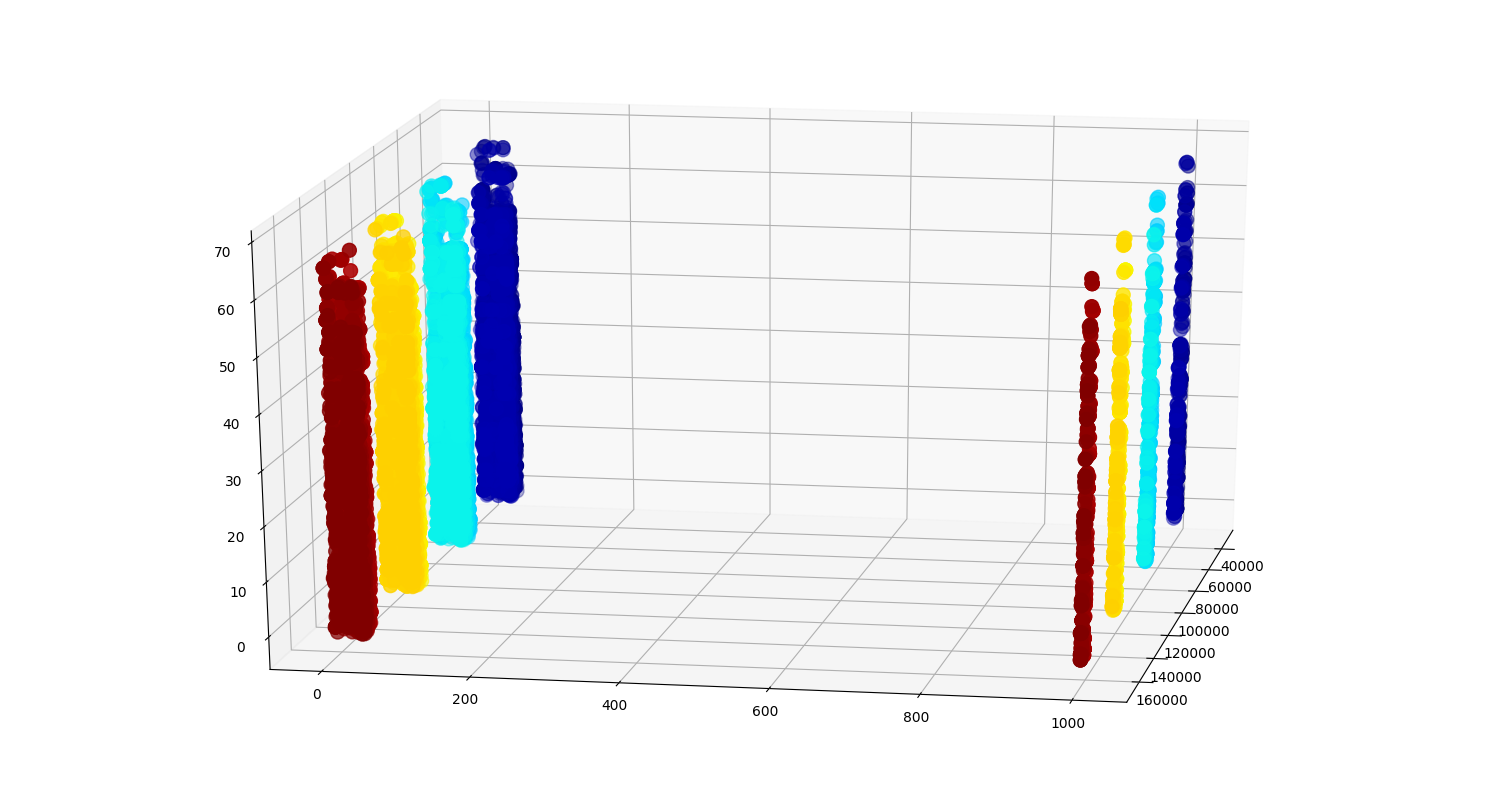

<IPython.core.display.Javascript object>


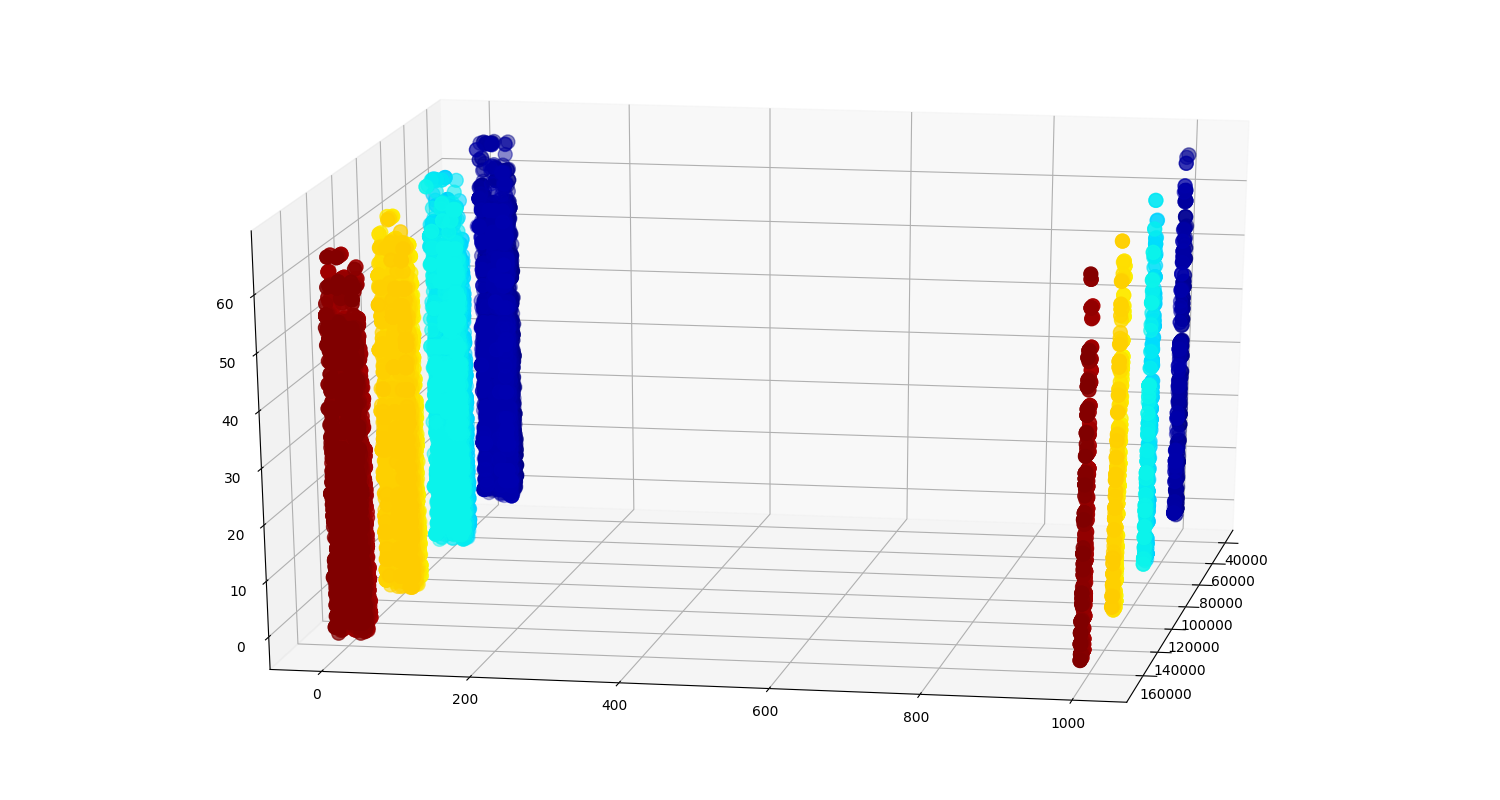

<IPython.core.display.Javascript object>


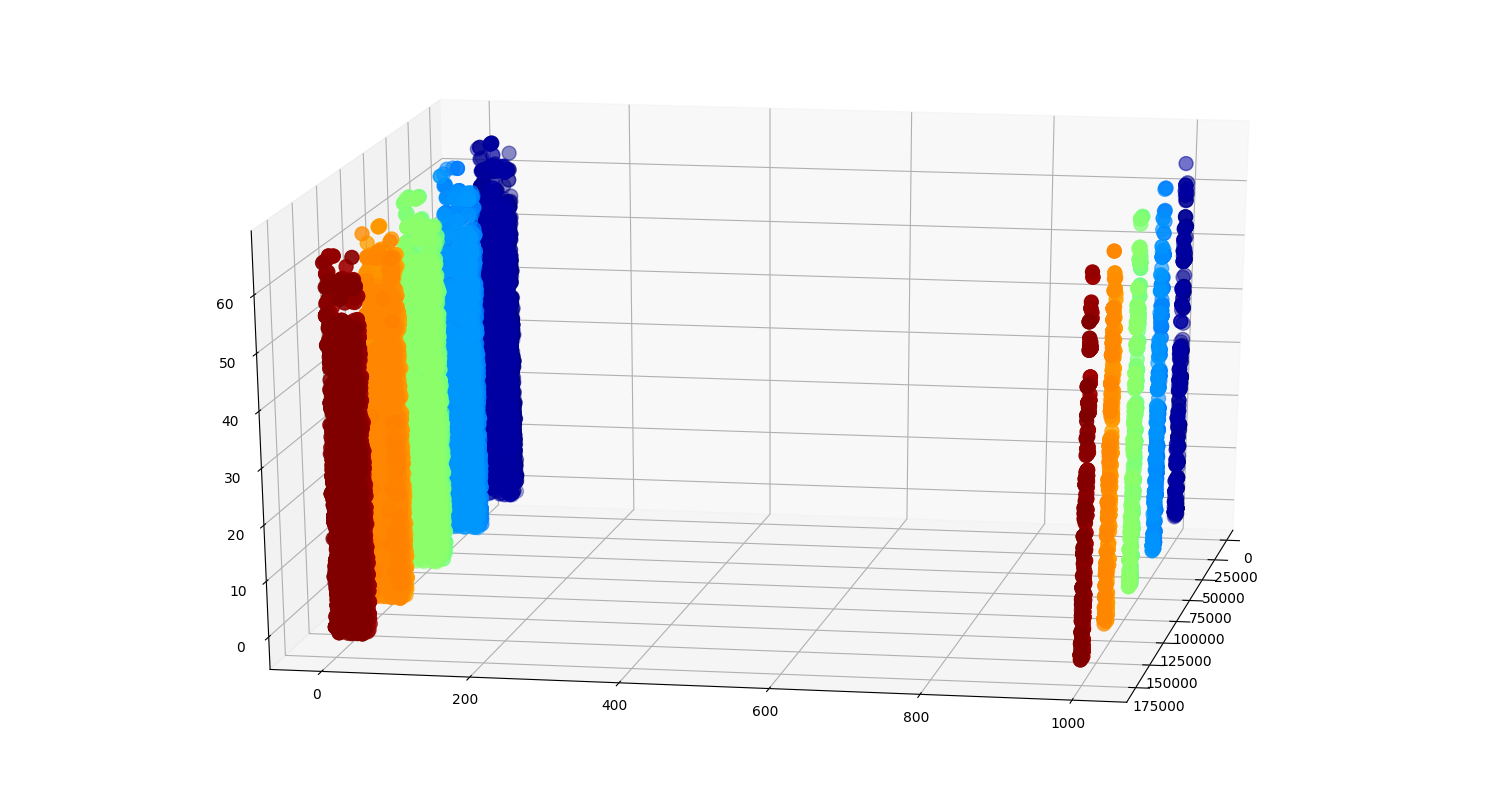

<IPython.core.display.Javascript object>


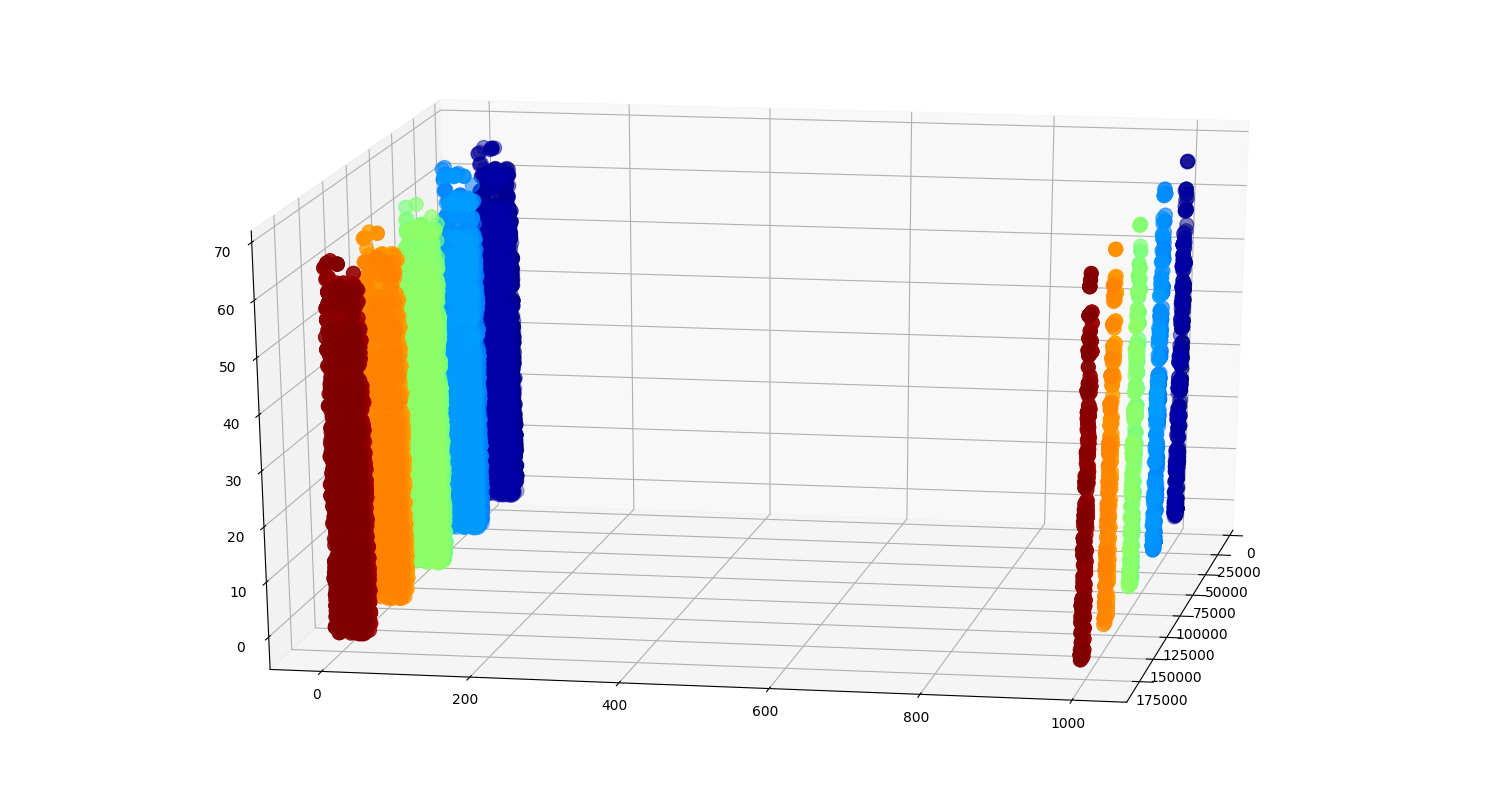

<IPython.core.display.Javascript object>


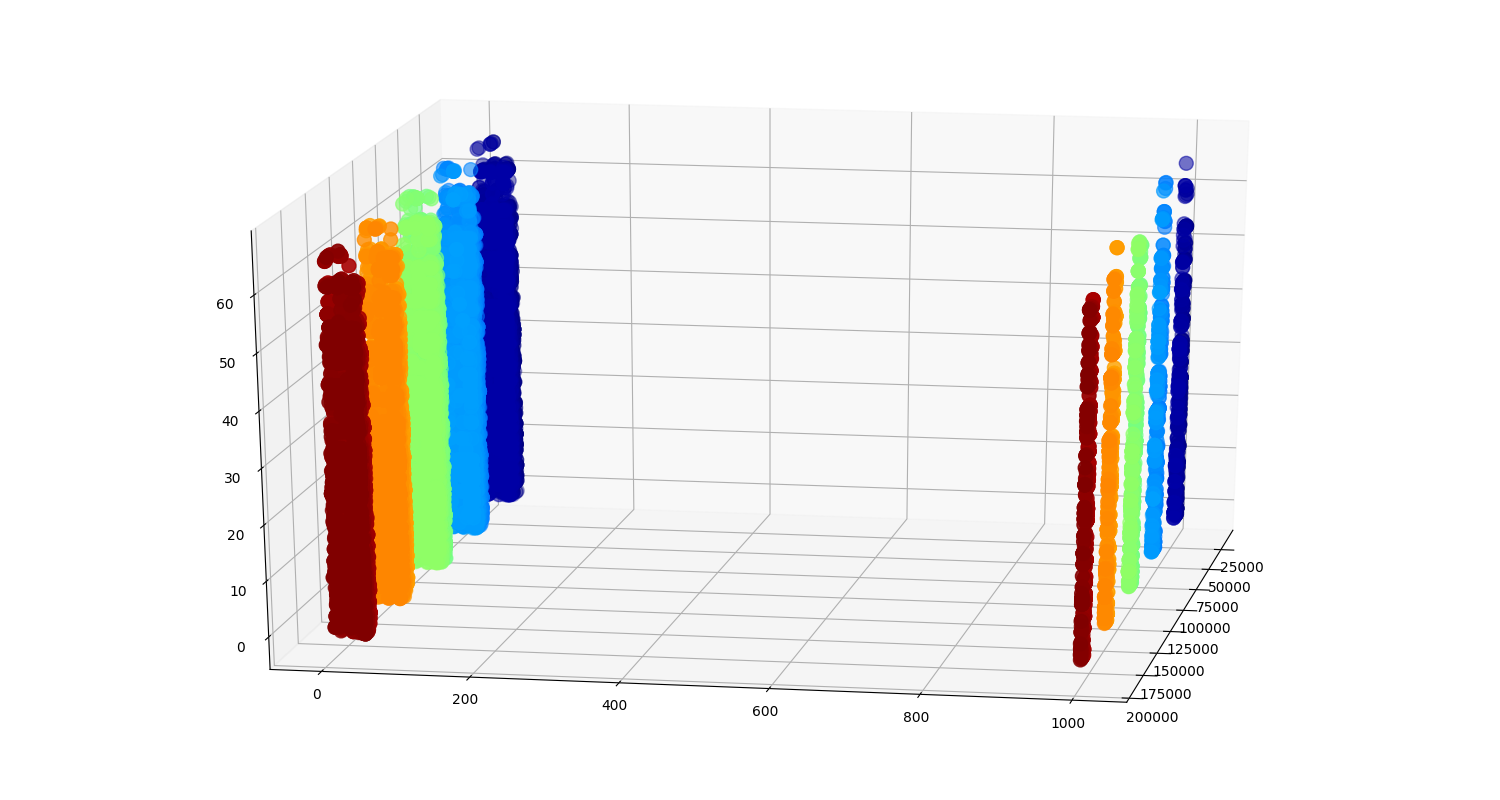

In [141]:
%matplotlib notebook
X0 = train.drop(['Upc', 'ScanCount', 'count', 'Weekday', 'DepartmentDescription'], axis=1)

for num in range(0, 7):
    X = X0[X0['weeknum'] == num]
    y = X['TripType']
    
    N =  len(X['VisitNumber'].unique())# Number of labels
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    
    fig = plt.figure(figsize=(15,8))
    ax = Axes3D(fig, elev=20, azim=10)
    ax.scatter(X['VisitNumber'], y, X['DD_num'], c=X['VisitNumber'], marker='o', s=100, cmap=cmap)
ax.mouse_init()
plt.show()